## Predict survival on the titanic

In [1]:
#---------Steps------------

#Define the problem statement
#Collect the Data
#Exploratory data analysis
#Feature Engineering
#Feature Selection
#Modeling 
#Testing

## The Challenge

Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [2]:
#Data Set
import pandas as pd
train=pd.read_csv('train.csv') 
test=pd.read_csv('test.csv')     

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Description

#### Survived : 0=No ,1=Yes
#### Pclass : Ticket Class
#### SibSp  : # of sibilings	
#### Parch : # of Parents
#### Ticket : Ticket no
#### Cabin : Cabin No
#### Embarked : Port of embarkation

In [4]:
#Size
train.shape

(891, 12)

In [5]:
#Size
test.shape

(418, 11)

In [6]:
train.info()
#looking at the deatils of the details,can see Age column and Cabin columns have some missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()
#looking at the deatils of the details,can see Age column, Fare column  and Cabin columns have some missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()
#amount of missing values for each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
test.isnull().sum()
#amount of missing values for each column

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

### Data Visualization 

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()#seaborn defaults


In [13]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

#### Bar charts 

In [14]:
#-------Categorical Features----------

#Pclass
#sex
#Sibsp
#Parch
#Embarked
#Cabin

In [15]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

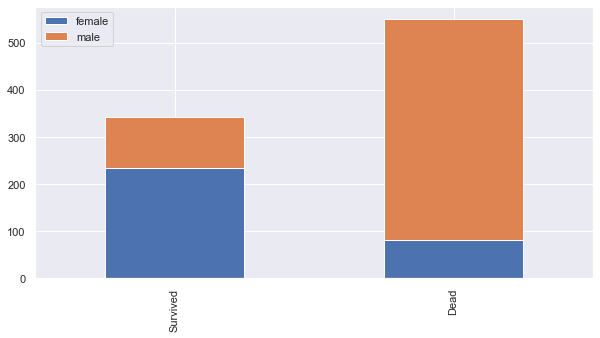

In [16]:
bar_chart('Sex')


In [17]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

it shows that the survived women count is larger than men.

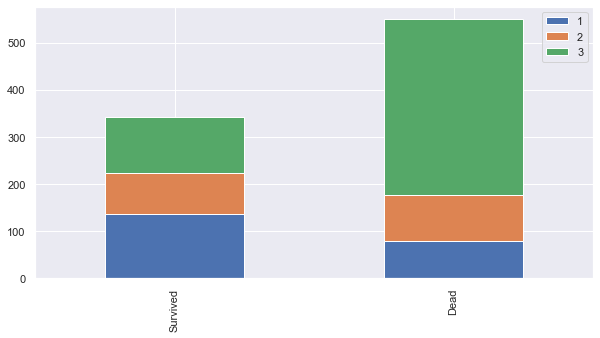

In [18]:
bar_chart('Pclass')

#### first class survived amount is higher and the death amount is low.
#### Third class survived amount is higher than 2nd class  and the death amount is larger than both other two classes.

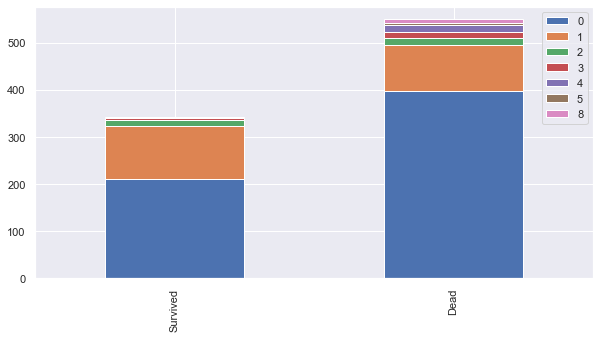

In [19]:
bar_chart('SibSp')

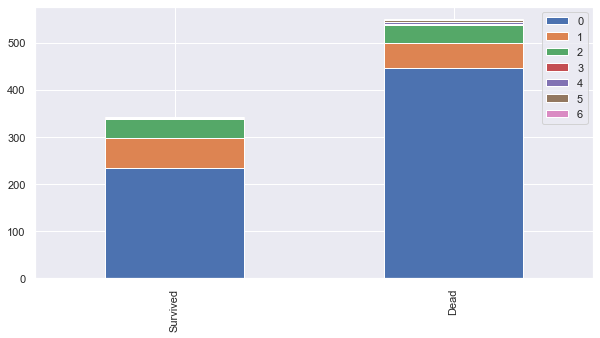

In [20]:
bar_chart('Parch')

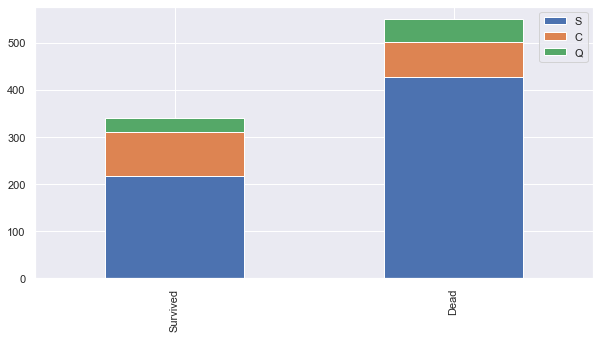

In [21]:
bar_chart('Embarked')

In [22]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

## Feature Engineering

In [23]:
#create features that make ML Algorithms work 
#in here empty fields filled with data by using some techniques.

In [24]:
#Filterout the relavant data from the name column

In [25]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [26]:
train_test_data=[train,test] # combining test and train datsets

for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [27]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Lady          1
Don           1
Sir           1
Mme           1
Jonkheer      1
Ms            1
Countess      1
Capt          1
Name: Title, dtype: int64

In [28]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Title          False
dtype: bool

In [29]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [30]:
train['Title'].isna().any()

False

#### in this case just considering on Mr,Mrs,Miss and others as 4 groups.

#### Mr values known as 0
#### Miss values known as 1
#### Mrs values known as 2
#### Others values known as 3

In [31]:
title_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mlle":3,"Countess":3,"Ms":3,"Lady":3,"Jonkheer":3,"Don":3,"Dona":3,"Mme":3,"Capt":3,"Sir":3}
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [32]:
train['Title'].isna().any()

False

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [34]:
#title column have numerical values and can use it for calculations now

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [36]:
train['Title'].isna().any()

False

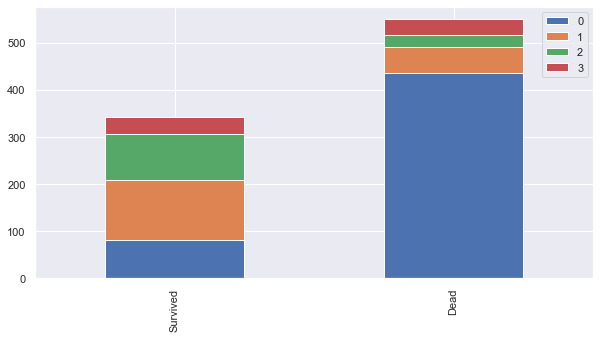

In [37]:
bar_chart('Title')

In [38]:
#### Mr values known as 0
#### Miss values known as 1
#### Mrs values known as 2
#### Others values known as 3

# so we can see most of Mr's were dead.

In [39]:
# after getting the information which want from name column,we can drop the name column.

In [40]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [42]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [43]:
#after droping name column,there is some other valuble data in the dataset,which is string.The column "Sex".So we have to convert its values in to numerical mode.

In [44]:
Gender_mapping = {"male":0,"female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(Gender_mapping)

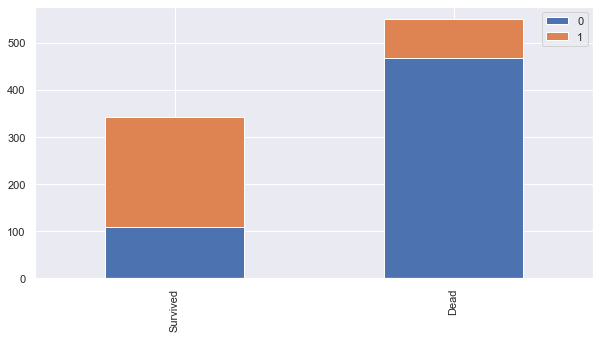

In [45]:
bar_chart('Sex')

In [46]:
# male:0,  female:1
# Most of men couldn't survived.

### There were some values missing in age column.We have to get some average vlue for that.

In [47]:
train.head(12)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [48]:
#for getting median age value,have to consider about the persons title[Mr/Mrs/Miss/Other]
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)

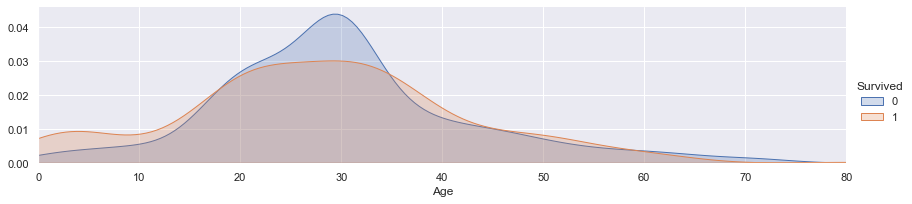

In [49]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

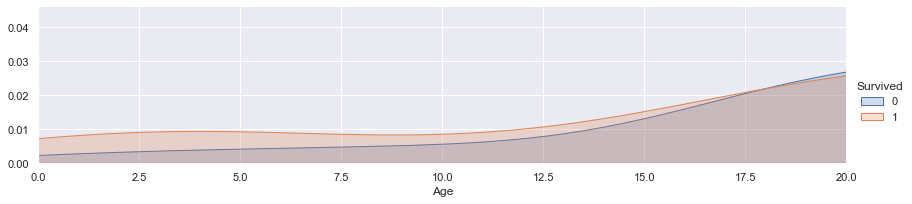

In [50]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)


(20.0, 30.0)

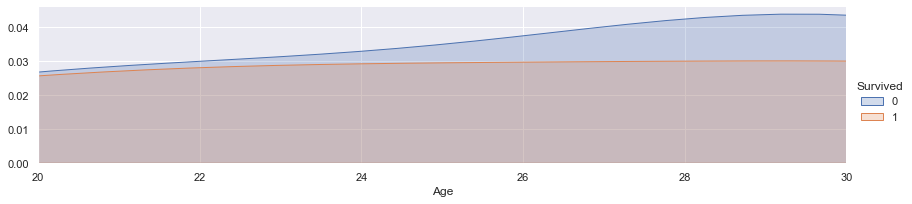

In [51]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

(30.0, 40.0)

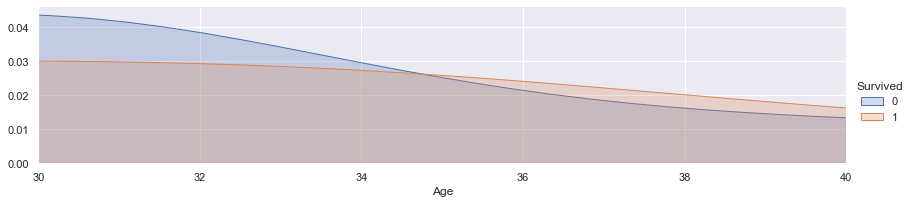

In [52]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(30,40)

(40.0, 60.0)

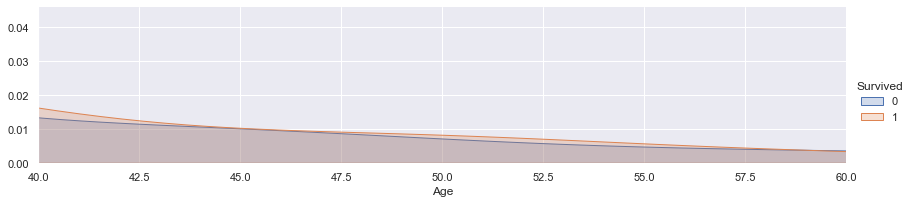

In [53]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

(60.0, 80.0)

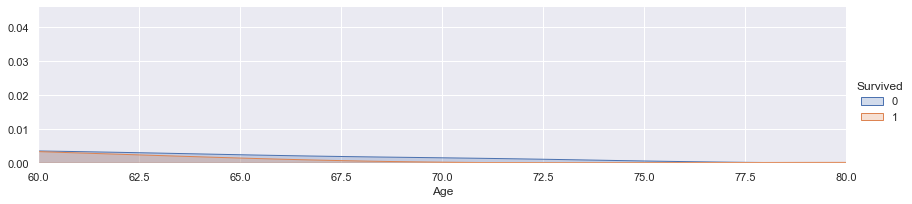

In [54]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [57]:
#creating just age groups is not helpful in this manner.we have to convert them in to some numerical age in some categorical way.
#for that case considering ,

#child: 0
#young: 1
#adult: 2
#mid-age: 3
#senior: 4

In [58]:
dataset['Age'].isna().any()

False

In [59]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [60]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


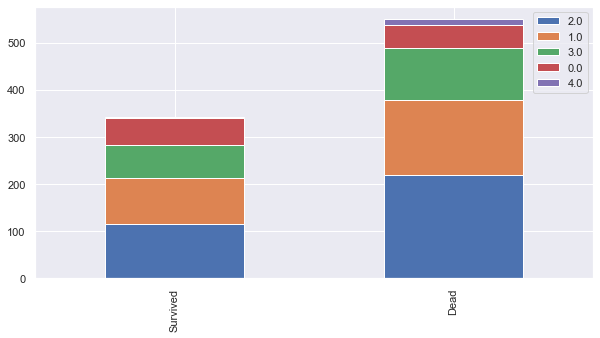

In [61]:
bar_chart('Age')

### Embarked
#### filling missing values

<AxesSubplot:>

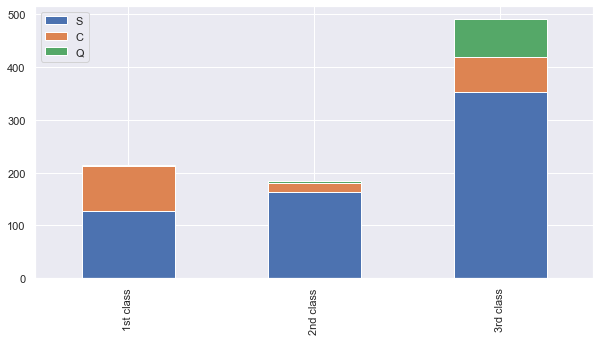

In [62]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [63]:
#more than 50% of 1st class are from S embark
#more than 50% of 2nd class are from S embark
#more than 50% of 3rd class are from S embark

In [64]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [65]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [66]:
#because most of the people embarked from the city S , filling data will be S for embarked. 

In [67]:
embarked_mapping = {"S": 0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [68]:
dataset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,2,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,2,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,0,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,0,2


## Fare

In [69]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


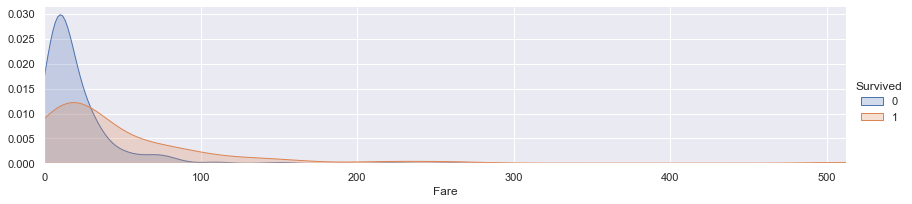

In [70]:
#median value for the fare
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

(0.0, 20.0)

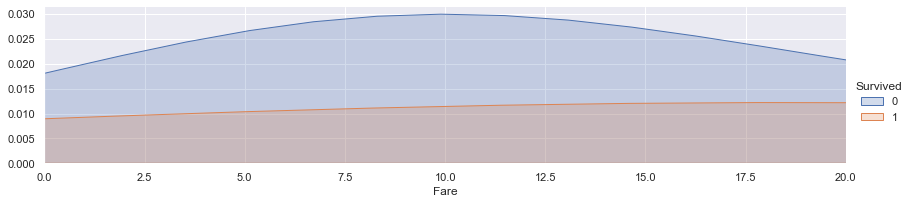

In [71]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0.0, 30.0)

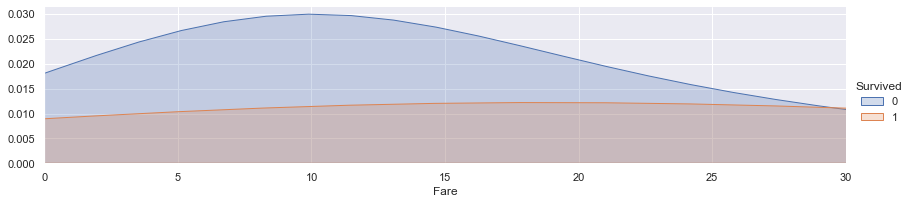

In [72]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0.0, 512.3292)

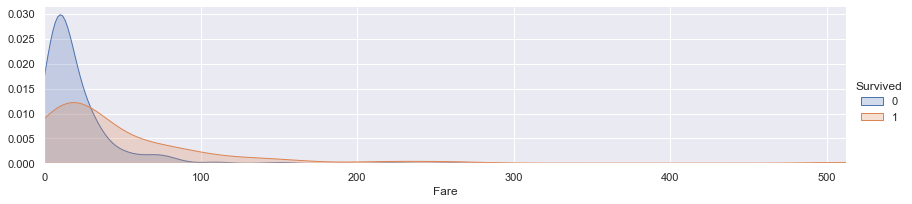

In [73]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [74]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [75]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### Cabin

In [76]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
F2             3
              ..
C110           1
C148           1
A34            1
D49            1
C90            1
Name: Cabin, Length: 147, dtype: int64

In [77]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

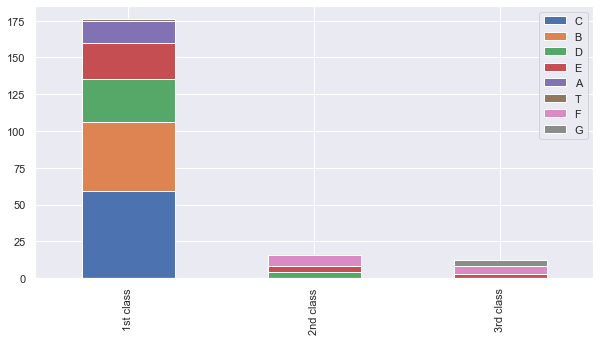

In [78]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [79]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [80]:
# fill missing Fare with median fare for each Pclass

train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

## FamilySize

In [81]:
#adding kids and parents together as family
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

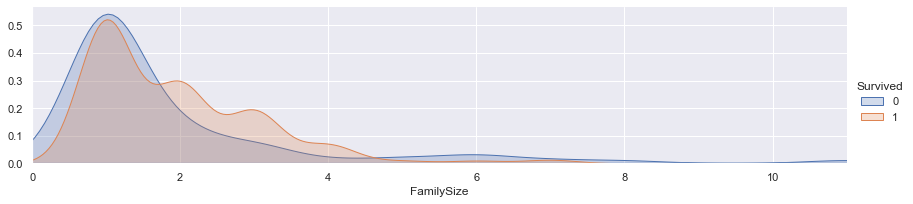

In [82]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [83]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [84]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [85]:
#after getting family size,Sibsp is not a some thing value,and parch also.Ticket details is not showing and data relavant for calculations.
#so we can drop these columns and id column
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [86]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [87]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [88]:
train_data.head(20)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


## Train Test split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train, x_test, y_train, y_test = train_test_split(train_data, target)

## Modelling

In [91]:
# Importing Classifier Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import KFold
from sklearn import metrics

## GaussianNB

### Hyper parameter tuning

In [92]:
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gs = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=10, verbose=1, scoring='accuracy', n_jobs=-1)

gs.fit(train_data, target)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.6s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [93]:
print('Best accuracy: ', gs.best_score_)
print('Best parameters: ', gs.best_params_)
print('CV results: ', gs.cv_results_)

Best accuracy:  0.7913108614232209
Best parameters:  {'var_smoothing': 0.0533669923120631}
CV results:  {'mean_fit_time': array([0.00614257, 0.00363538, 0.00365908, 0.00336618, 0.00310667,
       0.00328944, 0.00388517, 0.00324924, 0.00365057, 0.00285776,
       0.00324998, 0.00329499, 0.00370851, 0.0034333 , 0.00307286,
       0.00350168, 0.00288718, 0.00307934, 0.00359368, 0.00324938,
       0.00323267, 0.00285678, 0.00299566, 0.00313203, 0.00306935,
       0.00304055, 0.00323651, 0.00324893, 0.00294189, 0.00303795,
       0.00382736, 0.00338905, 0.00404513, 0.00304327, 0.00353651,
       0.0031709 , 0.00336142, 0.00389872, 0.0043577 , 0.00345995,
       0.0033572 , 0.00315349, 0.00309305, 0.00372124, 0.00319533,
       0.00307353, 0.00289242, 0.00333123, 0.00370078, 0.00300994,
       0.00503013, 0.00310445, 0.00511744, 0.00433502, 0.01116936,
       0.00321422, 0.00331485, 0.00276186, 0.00515728, 0.00333087,
       0.00465772, 0.00726497, 0.0031672 , 0.00267093, 0.00493069,
       

In [94]:
# Best accuracy:  0.7913108614232209
# Best parameters:  {'var_smoothing': 0.0533669923120631}

### GNB tuned model

In [95]:
gnb = GaussianNB(var_smoothing=0.0533669923120631)

In [96]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=0.0533669923120631)

In [97]:
# GNB pr4edictions for x_test
y_gnb_pred = gnb.predict(x_test)

In [98]:
print("Gaussian Classifier accuracy:", metrics.accuracy_score(y_test, y_gnb_pred)*100)

Gaussian Classifier accuracy: 82.51121076233184


## Decision Tree

### Hyper parameter tuning

In [99]:
dt = DecisionTreeClassifier()

param_grid = {'max_leaf_nodes': list(range(1, 100)),
              'min_samples_split': [2, 3, 4]}


gs = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, verbose=1, scoring='accuracy', n_jobs=-1)

gs.fit(train_data, target)

Fitting 10 folds for each of 297 candidates, totalling 2970 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2864 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 2955 out of 2970 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2970 out of 2970 | elapsed:    2.5s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,


In [100]:
print('Best accuracy: ', gs.best_score_)
print('Best parameters: ', gs.best_params_)
print('CV results: ', gs.cv_results_)

Best accuracy:  0.8372908863920099
Best parameters:  {'max_leaf_nodes': 22, 'min_samples_split': 4}
CV results:  {'mean_fit_time': array([0.00270722, 0.00230825, 0.00228062, 0.00254028, 0.00256197,
       0.0029521 , 0.00320642, 0.00310028, 0.00269372, 0.00327003,
       0.00320807, 0.00283825, 0.00310531, 0.0027952 , 0.00288959,
       0.00285501, 0.0030607 , 0.00237036, 0.00254674, 0.00293043,
       0.00288615, 0.00256045, 0.00256407, 0.00201669, 0.00340407,
       0.00309331, 0.0031368 , 0.00324869, 0.00329542, 0.00280228,
       0.00316479, 0.00384574, 0.0047735 , 0.00275588, 0.00264761,
       0.00307825, 0.00238774, 0.00286691, 0.00269599, 0.00300598,
       0.00289991, 0.00294755, 0.00310221, 0.00325081, 0.00278945,
       0.00301132, 0.00320621, 0.0028235 , 0.0030102 , 0.00325124,
       0.00572841, 0.00417185, 0.00566716, 0.0039649 , 0.00370758,
       0.003022  , 0.00371494, 0.00340123, 0.0029161 , 0.00385532,
       0.00334063, 0.00299685, 0.00390072, 0.00439432, 0.00728638

In [101]:
# Best accuracy:  0.8384144818976278
# Best parameters:  {'max_leaf_nodes': 22, 'min_samples_split': 2}

### DT tuned model

In [102]:
dt = DecisionTreeClassifier(max_leaf_nodes=22, min_samples_split=2)

In [103]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=22,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [104]:
# Decision tree predictions for x_test
y_dt_pred = dt.predict(x_test)

In [105]:
print("Decision Tree accuracy:", metrics.accuracy_score(y_test, y_dt_pred)*100)

Decision Tree accuracy: 82.0627802690583


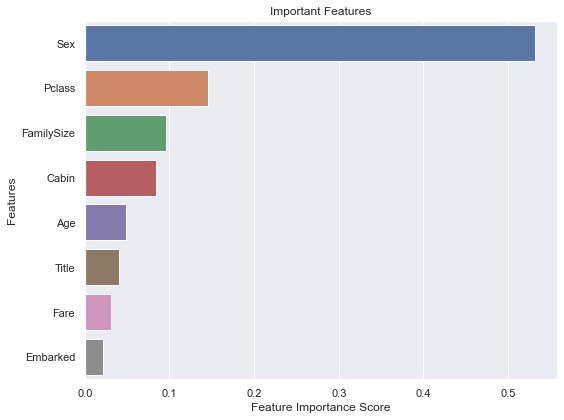

In [106]:
feature_imp = pd.Series(dt.feature_importances_, index=x_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.tight_layout()

## Confusion Matrix

### For Decision Tree

In [107]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [108]:
y_dt_pred_bool = (y_dt_pred > 0.5)

In [109]:
c_matrix = confusion_matrix(y_test, y_dt_pred_bool)
print(c_matrix)

[[122   9]
 [ 31  61]]


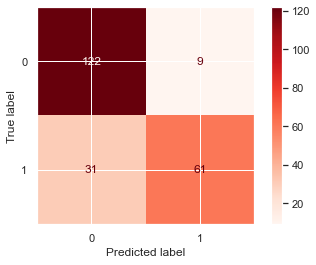

In [110]:
# visualize it
plot_confusion_matrix(
    dt,
    x_test,
    y_test,
    cmap=plt.cm.Reds,
    values_format = '.0f')
plt.show()

### For GaussianNB 

In [111]:
y_gnb_pred_bool = (y_gnb_pred > 0.5)

In [112]:
c_matrix = confusion_matrix(y_test, y_gnb_pred_bool)
print(c_matrix)

[[108  23]
 [ 16  76]]


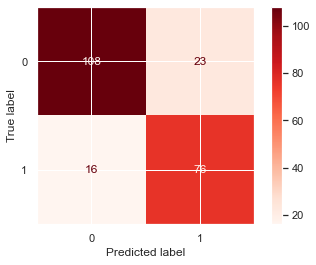

In [113]:
# visualize it
plot_confusion_matrix(
    gnb,
    x_test,
    y_test,
    cmap=plt.cm.Reds,
    values_format = '.0f')
plt.show()

## Cross Validation (K-fold)

### for Decision tree

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scoring = 'accuracy'

In [116]:
score = cross_val_score(dt, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.84269663 0.79775281 0.79775281 0.86516854 0.79775281
 0.82022472 0.83146067 0.83146067 0.78651685]


In [117]:
print('K-Foldaccuracy: ', score.mean() * 100)

K-Foldaccuracy:  82.04119850187264


### for GaussianNB

In [118]:
score = cross_val_score(gnb, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.7752809  0.73033708 0.75280899 0.74157303 0.84269663
 0.76404494 0.78651685 0.84269663 0.79775281]


In [119]:
print('K-Fold accuracy: ', score.mean() * 100)

K-Fold accuracy:  78.67041198501873


## Classification Report

### for Decision Tree

In [120]:
from sklearn.metrics import classification_report

In [121]:
print(classification_report(y_test,y_dt_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       131
           1       0.87      0.66      0.75        92

    accuracy                           0.82       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.82      0.82       223



### for GaussianNB

In [122]:
print(classification_report(y_test,y_gnb_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       131
           1       0.77      0.83      0.80        92

    accuracy                           0.83       223
   macro avg       0.82      0.83      0.82       223
weighted avg       0.83      0.83      0.83       223



## AUC ROC Curve

### for Decision Tree

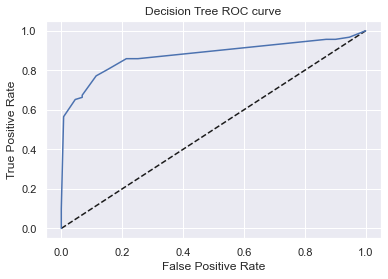

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

y_pred_dt_prb = dt.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_prb)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
plt.show()

In [124]:
from sklearn.metrics import roc_auc_score

print('ROC Score: ', roc_auc_score(y_test,y_pred_dt_prb))

ROC Score:  0.8745851310985728


### for GaussianNB

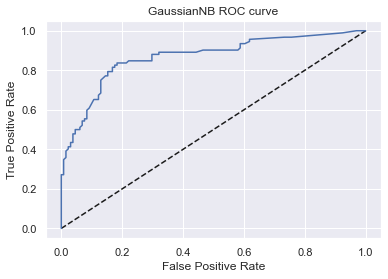

In [125]:

y_pred_gnb_prb = gnb.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gnb_prb)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB ROC curve')
plt.show()

In [126]:
print('ROC Score: ', roc_auc_score(y_test,y_pred_gnb_prb))

ROC Score:  0.8672004646531696


### ROC curve comparison of the two models

In [127]:
from sklearn.metrics import plot_roc_curve

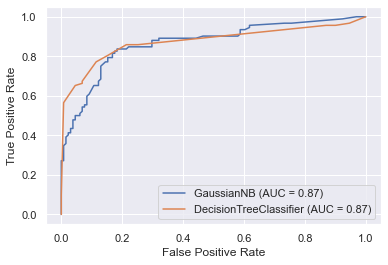

In [128]:
classifiers = [gnb, dt]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax)

## Precision Recall

### for Decision tree

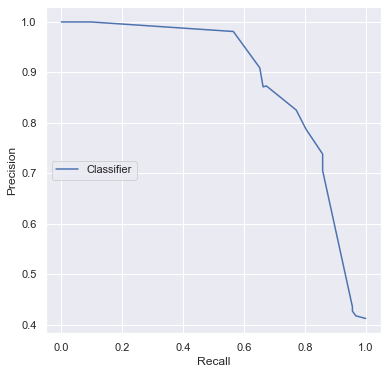

In [129]:
def plot_pr_curve(precision, recall, threshold):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(recall, precision, label='Classifier')
    baseline = len(y_test[y_test==1]) / len(y_test)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend(loc='center left');
    plt.show()

precision, recall, threshold = precision_recall_curve(y_test, y_pred_dt_prb)

plot_pr_curve(precision, recall, threshold)

### for GaussianNB

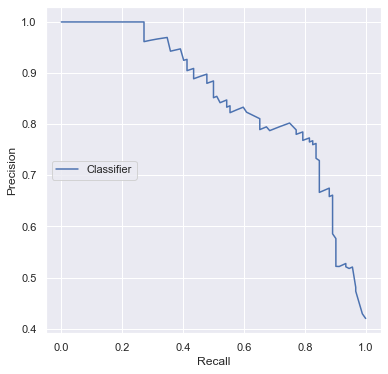

In [130]:
def plot_pr_curve(precision, recall, threshold):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(recall, precision, label='Classifier')
    baseline = len(y_test[y_test==1]) / len(y_test)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend(loc='center left');
    plt.show()

precision, recall, threshold = precision_recall_curve(y_test, y_pred_gnb_prb)

plot_pr_curve(precision, recall, threshold)

# Test Set Predictions

In [131]:
test_dt = test.copy()
test_gnb = test.copy()

### for Decision tree

In [132]:
test_dt.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.8


In [133]:
test_dt['Predictions'] = dt.predict(test_dt.loc[:, test.columns != 'PassengerId'])

In [134]:
test_dt.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,Predictions
0,892,3,0,2.0,0.0,2.0,2,0,0.0,0
1,893,3,1,3.0,0.0,2.0,0,2,0.4,0
2,894,2,0,3.0,0.0,2.0,2,0,0.0,0
3,895,3,0,2.0,0.0,2.0,0,0,0.0,0
4,896,3,1,1.0,0.0,2.0,0,2,0.8,0


In [135]:
test_predictions_dt = test_dt[['PassengerId','Predictions']]

In [136]:
test_predictions_dt.head()

,PassengerId,Predictions
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [137]:
test_predictions_dt.to_csv("decision_tree_pred.csv", index=False)

### for  GaussianNB

In [138]:
test_gnb['Predictions'] = gnb.predict(test_gnb.loc[:, test.columns != 'PassengerId'])

In [139]:
test_gnb.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,Predictions
0,892,3,0,2.0,0.0,2.0,2,0,0.0,0
1,893,3,1,3.0,0.0,2.0,0,2,0.4,1
2,894,2,0,3.0,0.0,2.0,2,0,0.0,0
3,895,3,0,2.0,0.0,2.0,0,0,0.0,0
4,896,3,1,1.0,0.0,2.0,0,2,0.8,1


In [140]:
test_predictions_gnb = test_gnb[['PassengerId','Predictions']]

In [141]:
test_predictions_gnb.head()

,PassengerId,Predictions
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [142]:
test_predictions_gnb.to_csv("gaussiannb_pred.csv", index=False)